In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.artist import Artist
import matplotlib.transforms as mtransforms

In [2]:
data = pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")
df = data[data['Entity'] == 'Poland']
column_names = ['Entity', "Code","Year", "Schizophrenia", "Bipolar disorder", "Eating disorders", "Anxiety disorders", "Drug use disorders", "Depression", "Alcohol use disorders"]
df = df.set_axis(column_names, axis=1)
df = df.reset_index()
column_names = ["Schizophrenia", "Bipolar disorder", "Eating disorders", "Anxiety disorders", "Drug use disorders", "Depression", "Alcohol use disorders"]
df = df[column_names]
polish_column_names = ["Schizofrenia", "ChAD", "Zaburzenia odżywiania", "Zaburzenia lękowe", "Narkomania", "Depresja", "Alkoholizm"]
columns = {column_names[i]:polish_column_names[i] for i in range(7)}
df = df.rename(columns=columns)
df = df.sort_values(by=0, ascending=True, axis=1)

<IPython.core.display.Javascript object>


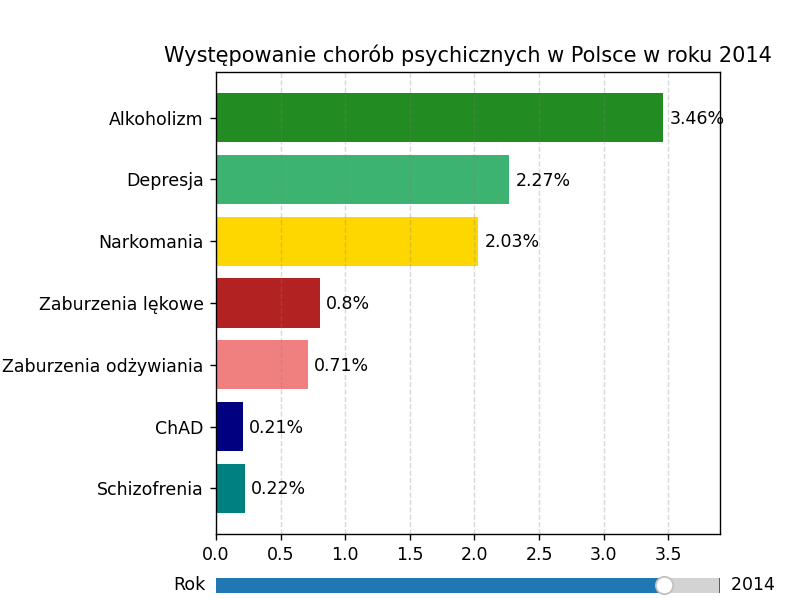

In [7]:
%matplotlib notebook
    
fig, ax = plt.subplots()
colors = ['forestgreen', 'mediumseagreen', 'gold', 'firebrick', 'lightcoral', 'navy', 'teal']
texts = []
bars = plt.barh(np.arange(7), df.loc[0].tolist(), color=colors[::-1])
_, labels = plt.yticks(np.arange(7), polish_column_names)
ax.set_xlim(0, 3.9)
ax.set_title("Występowanie chorób psychicznych w Polsce w roku 2017")
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.3)
for j, key in enumerate(df.keys()):
    value = df[key].loc[len(df.index)-1]
    bars[j].set_width(value)
    text = str(round(value, 2))+"%"
    tmp = ax.text(value+0.05, j-.1, s=text)
    texts.append(tmp)

axyear = plt.axes([0.27, 0, 0.63, 0.05])
year_slider = Slider(
    ax=axyear,
    label='Rok',
    valmin=1990,
    valmax=2017,
    valinit=2017,
    valstep=1
)

def update(val):
    for text in texts:
        Artist.set_visible(text, False)
    i = year_slider.val-1990
    ax.set_title("Występowanie chorób psychicznych w Polsce w roku "+str(val))
    for j, key in enumerate(df.keys()):
        value = df[key].loc[i]
        bars[j].set_width(value)
        text = str(round(value, 2))+"%"
        tmp = ax.text(value+0.05, j-.1, s=text)
        texts.append(tmp)
    
year_slider.on_changed(update)


plt.subplots_adjust(left=0.27)
    
plt.show()

<IPython.core.display.Javascript object>


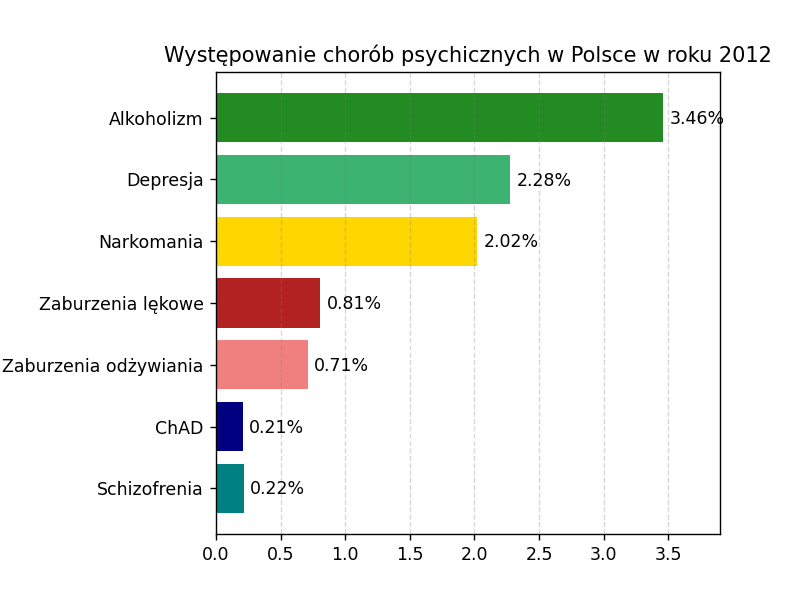

In [4]:
fig, ax = plt.subplots()
colors = ['forestgreen', 'mediumseagreen', 'gold', 'firebrick', 'lightcoral', 'navy', 'teal']
texts = []
bars = plt.barh(np.arange(7), df.loc[0].tolist(), color=colors[::-1])
_, labels = plt.yticks(np.arange(7), polish_column_names)
ax.set_xlim(0, 3.9)
ax.set_title("Występowanie chorób psychicznych w Polsce w roku 2017")
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.3)
plt.subplots_adjust(left=0.27)
for j, key in enumerate(df.keys()):
    value = df[key].loc[len(df.index)-1]
    bars[j].set_width(value)
    text = str(round(value, 2))+"%"
    tmp = ax.text(value+0.05, j-.1, s=text)
    texts.append(tmp)
    
plt.savefig("Choroby_psychiczne_2017.png", dpi=100)